In [1]:
import cProfile
import pstats

from ARGUS_Needle_Network import ARGUS_Needle_Network

In [2]:
img_dir = "../../Data_PNB/stephen_prep"
anno_dir = "../../Data_PNB/stephen_prep"

In [3]:
nnet = ARGUS_Needle_Network(use_needle_settings=True)
nnet.setup_vfold_files(img_dir, anno_dir)

vfold_num = 0
run_num = 0
device_num = 0

6.528864338062704 gibibyte
0.01287497766315937 gibibyte
Num images / labels = 30 30
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [4]:
nnet.setup_training_vfold(vfold_num)

Loading dataset: 100%|█████████████████████████| 7/7 [00:14<00:00,  2.11s/it]


../../Data_PNB/stephen_prep\1. 189 AC_Video 1_cropM_prep.nii.gz
         799099 function calls (784079 primitive calls) in 3.387 seconds

   Ordered by: cumulative time
   List reduced from 10046 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    3.387    1.693 c:\src\venv_src_monai\lib\site-packages\IPython\core\interactiveshell.py:3362(run_code)
    214/2    0.000    0.000    3.387    1.693 {built-in method builtins.exec}
        1    0.000    0.000    3.387    3.387 C:\Users\stephen.aylward\AppData\Local\Temp\ipykernel_14076\2427183841.py:3(<cell line: 3>)
        1    0.021    0.021    3.387    3.387 C:\src\AnatomicRecon-POCUS-AI\PNB\Experiments\ARUNet-Needle\ARGUS_Needle_Network.py:768(view_training_image)
        2    1.513    0.756    3.112    1.556 C:\src\ITK-Release\Wrapping\Generators\Python\itk\support\extras.py:1122(imread)
 9231/116    0.003    0.000    1.695    0.015 C:\src\ITK-Release\Wrap

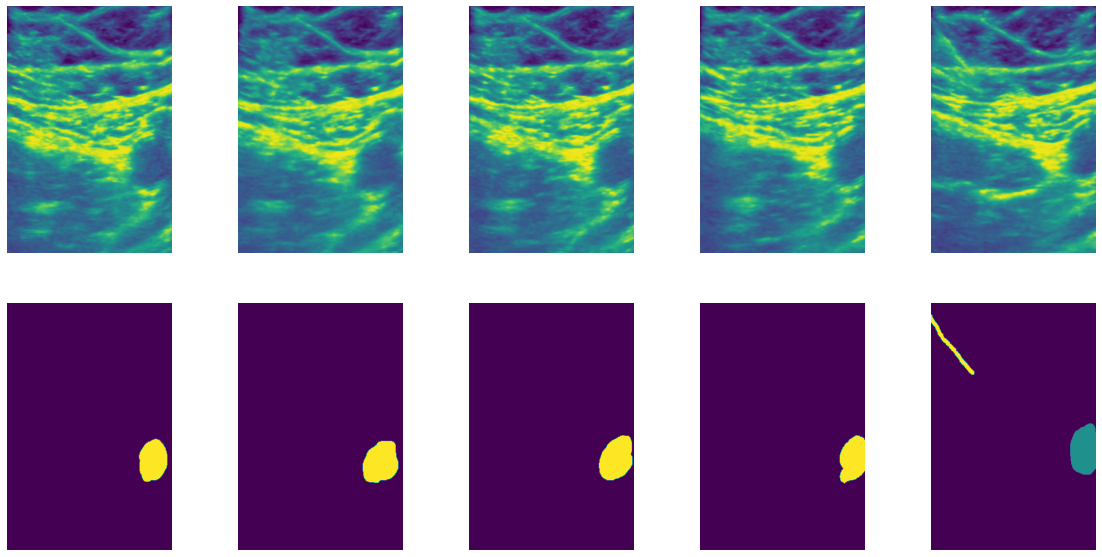

In [5]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_image(3)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats(20)


         2133424 function calls (2100568 primitive calls) in 21.108 seconds

   Ordered by: internal time
   List reduced from 1108 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        8   10.410    1.301   13.572    1.696 {method 'dump' of '_pickle.Pickler' objects}
       64    4.085    0.064    4.085    0.064 {method 'acquire' of '_thread.lock' objects}
      540    3.086    0.006    3.086    0.006 {method '_share_filename_cpu_' of 'torch._C.StorageBase' objects}
       78    1.005    0.013    1.005    0.013 {built-in method scipy.ndimage._nd_image.geometric_transform}
       10    0.706    0.071    0.706    0.071 {built-in method _winapi.WaitForSingleObject}
      156    0.227    0.001    0.227    0.001 {built-in method scipy.ndimage._nd_image.spline_filter1d}
      858    0.165    0.000    0.167    0.000 c:\src\venv_src_monai\lib\site-packages\matplotlib\_api\__init__.py:132(check_shape)
94792/80750    0.041    0.000    0.0

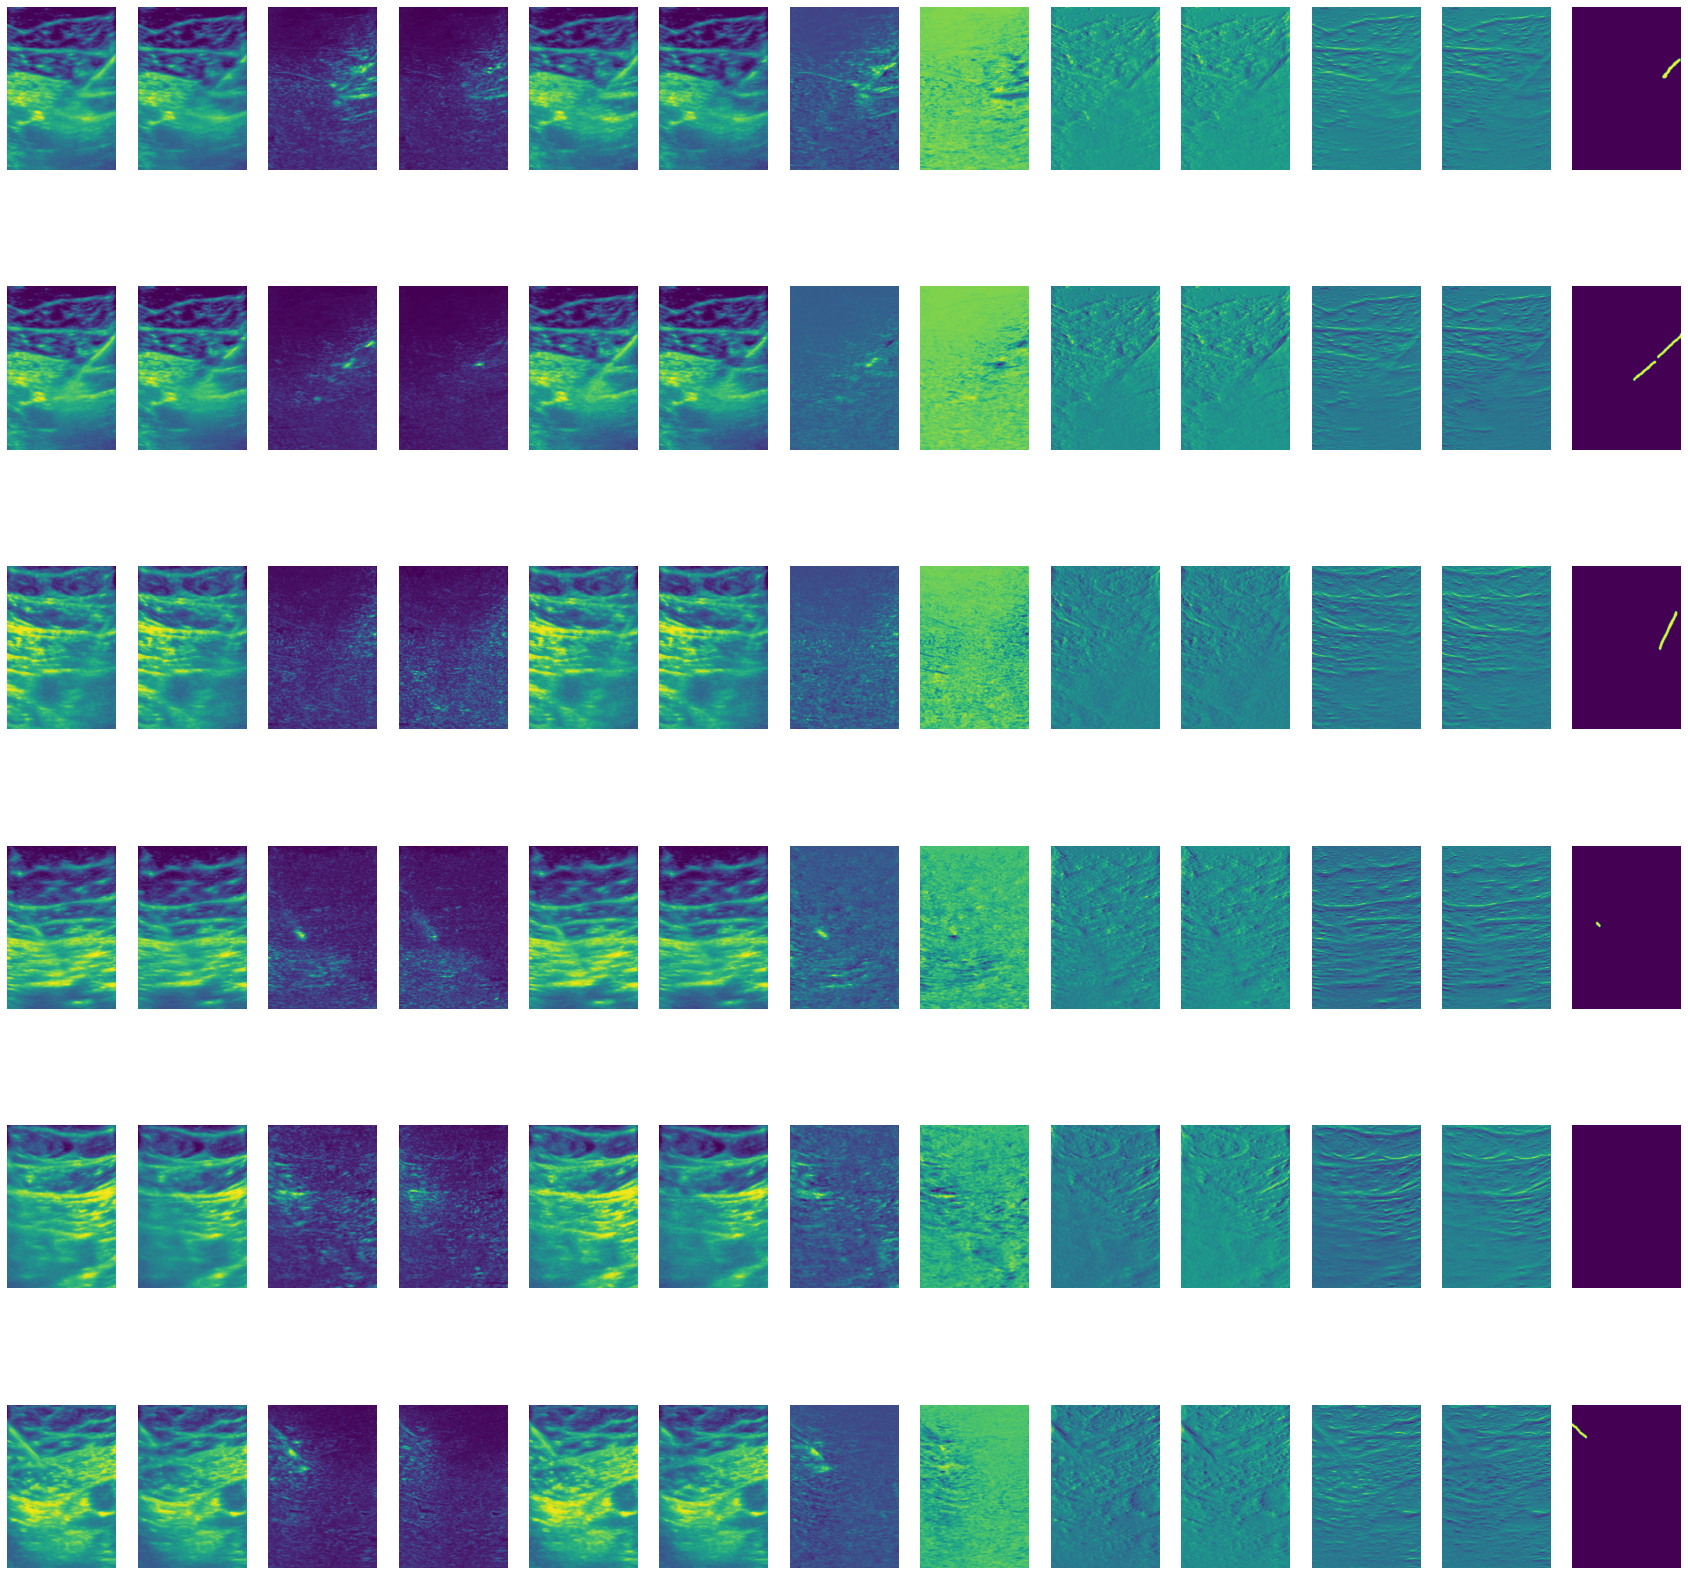

In [6]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_vfold_batch(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(40)


In [7]:
profiler = cProfile.Profile()
profiler.enable()
nnet.max_epochs = 5
nnet.train_vfold(run_num,device_num)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(100)


----------
0: epoch 1/5
0 / 3, train_loss: 0.6636
1 / 3, train_loss: 0.6614
2 / 3, train_loss: 0.6618
3 / 3, train_loss: 0.6633
0 epoch 1 average loss: 0.8833
----------
0: epoch 2/5
0 / 3, train_loss: 0.6574
1 / 3, train_loss: 0.6584
2 / 3, train_loss: 0.6546
3 / 3, train_loss: 0.6552
0 epoch 2 average loss: 0.8752
----------
0: epoch 3/5
0 / 3, train_loss: 0.6523
1 / 3, train_loss: 0.6517
2 / 3, train_loss: 0.6510
3 / 3, train_loss: 0.6529
0 epoch 3 average loss: 0.8693
----------
0: epoch 4/5
0 / 3, train_loss: 0.6478
1 / 3, train_loss: 0.6502
2 / 3, train_loss: 0.6461
3 / 3, train_loss: 0.6506
0 epoch 4 average loss: 0.8649
----------
0: epoch 5/5
0 / 3, train_loss: 0.6467
1 / 3, train_loss: 0.6452
2 / 3, train_loss: 0.6488
3 / 3, train_loss: 0.6443
0 epoch 5 average loss: 0.8616
         492772 function calls (463320 primitive calls) in 89.094 seconds

   Ordered by: internal time
   List reduced from 635 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  perca